In [158]:
import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib import collections
import numpy as np

from main import plot_segments, plot_lines
from cluster import cluster_segments
from optimize import find_vanishing_points

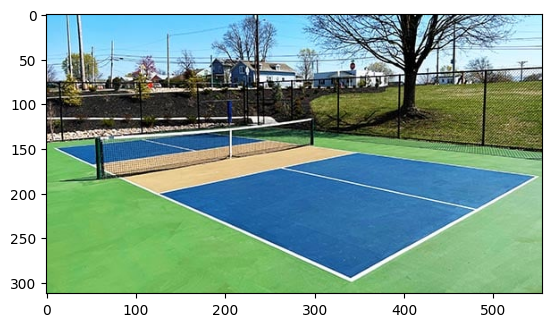

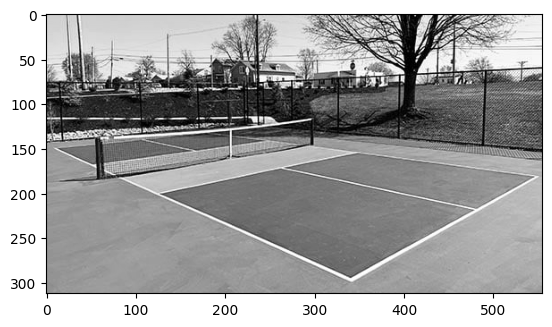

In [7]:
IM_PATH = "C:/Users/echapman/Downloads/pball_crawler/your_image_dir/000002.jpg"

im = cv.cvtColor(cv.imread(IM_PATH), cv.COLOR_BGR2RGB)
im_gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
plt.imshow(im)
plt.figure()
plt.imshow(im_gray, cmap="gray")

# plt.figure()
# im_gaus = cv.GaussianBlur(im, (31, 31), 0)
# im_blur = cv.medianBlur(im_gray, 51)
# im_mask = np.abs(im_gray - im_blur) < 200
# plt.imshow(im_mask, cmap="gray")
# plt.imshow(im_gaus)

345
898


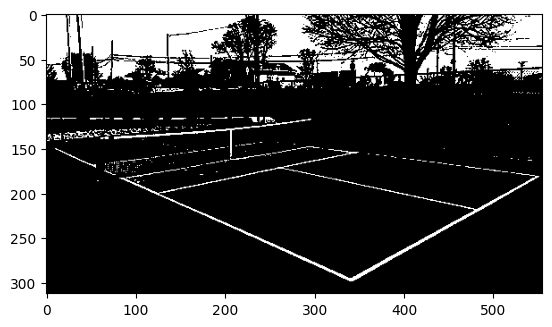

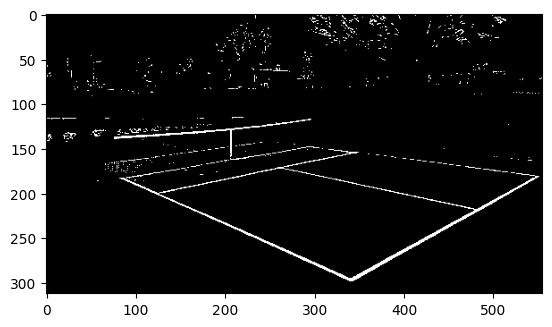

In [153]:
retval, im_thresh = cv.threshold(im_gray, 200, 255, cv.THRESH_BINARY)
plt.imshow(im_thresh, cmap="gray")
plt.figure()

area_threshold = 100

def is_bad(con, im):
    convex_area = cv.contourArea(cv.convexHull(con))
    area = cv.contourArea(con)

    if area > 1 and area / convex_area > 0.25:
        con_mask = cv.drawContours(np.zeros_like(im), [con], -1, 1, -1)
        white_ratio = np.sum(np.multiply(im, con_mask)) / np.sum(con_mask) / 255
        if white_ratio > 0.25:
            return True
    
    return False
    # return area > 1000 and area / convex_area > 0.5

contours, _ = cv.findContours(im_thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
bad_contours = [con for con in contours if is_bad(con, im_thresh)]
im_thresh_trim = cv.drawContours(im_thresh, bad_contours, -1, 0, -1)
plt.imshow(im_thresh_trim, cmap="gray")
print(len(bad_contours))
print(len(contours))

(15, 4)


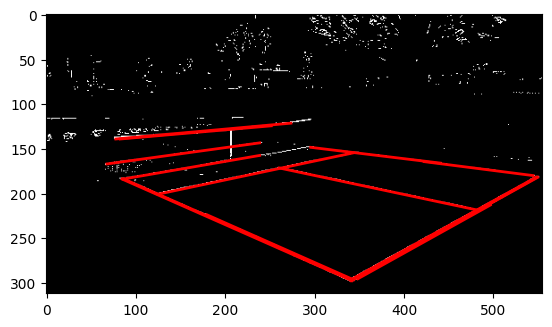

In [154]:
hough_lines = cv.HoughLinesP(
    image=im_thresh,
    rho=1,
    theta=np.pi / 180,
    threshold=75,
    minLineLength=50,
    maxLineGap=15,
)[:, 0, :]


_, ax1 = plt.subplots()
ax1.imshow(im_thresh, cmap="gray")
plot_segments(ax1, hough_lines, colors=["red"], linewidths=[2])
print(hough_lines.shape)

(8, 4)


<Figure size 640x480 with 0 Axes>

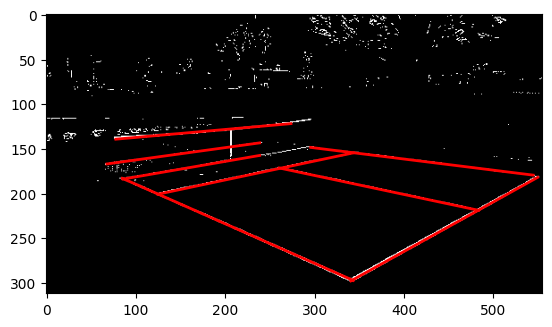

In [160]:
avg_lines = cluster_segments(hough_lines)["average_lines"]
plt.figure()
_, ax2 = plt.subplots()
ax2.imshow(im_thresh, cmap="gray")
plot_segments(ax2, avg_lines, colors=["red"], linewidths=[2])
print(avg_lines.shape)

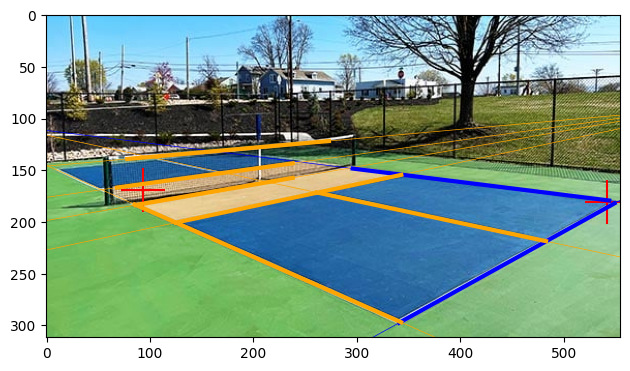

In [164]:
opt_out = find_vanishing_points(avg_lines, im.shape[0], im.shape[1])
avg_lines_classes = opt_out["classes"]
vp_a = opt_out["vp_a"]
vp_b = opt_out["vp_b"]

COLORS = {
    'blue':    '#377eb8',
    'orange':  '#ff7f00',
    'green':   '#4daf4a',
    'pink':    '#f781bf',
    'brown':   '#a65628',
    'purple':  '#984ea3',
    'gray':    '#999999',
    'yellow':  '#dede00',
    'red':     '#e41a1c',
}

COLOR_NAMES = list(COLORS.keys())

_, ax3 = plt.subplots()
ax3.imshow(im)
colors = [COLOR_NAMES[cl] for cl in avg_lines_classes]
plot_lines(ax3, avg_lines, colors)
plot_segments(ax3, avg_lines, colors=colors, linewidths=3)
ax3.scatter(
    x=[vp_a[0], vp_b[0]], y=[vp_a[1], vp_b[1]],
    s=1000, marker='+', color="red"
)
plt.tight_layout()

plt.show()